In [10]:
%matplotlib inline
import torch
import torchvision
from PIL import Image
from torch import nn
import tools as tl

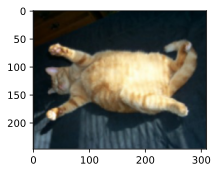

In [13]:
tl.set_figsize()
img = Image.open('../data/cat1.jpg')
tl.plt.imshow(img)
tl.plt.show()

In [16]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    tl.show_images(Y, num_rows, num_cols, scale=scale)
    tl.plt.show()

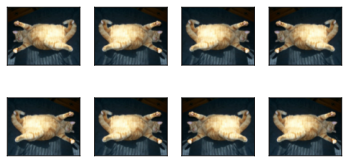

In [18]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

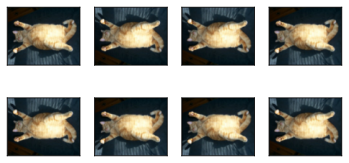

In [19]:
apply(img, torchvision.transforms.RandomVerticalFlip())

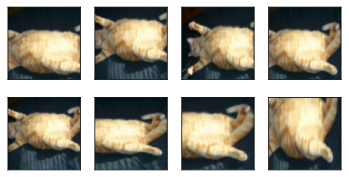

In [20]:
shape_aug = torchvision.transforms.RandomResizedCrop(200, scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

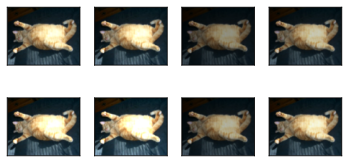

In [21]:
apply(img, torchvision.transforms.ColorJitter(brightness=0.5, contrast=0, saturation=0, hue=0))

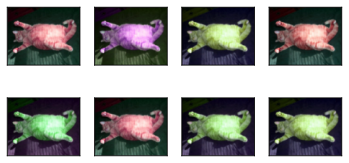

In [22]:
apply(img, torchvision.transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0.5))

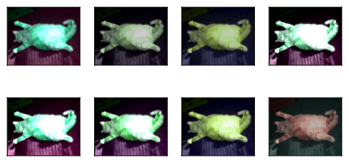

In [23]:
color_aug = torchvision.transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

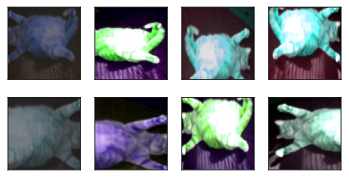

In [24]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)

Files already downloaded and verified


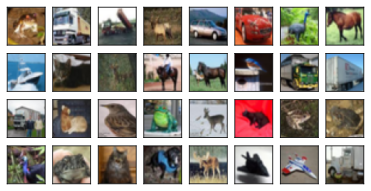

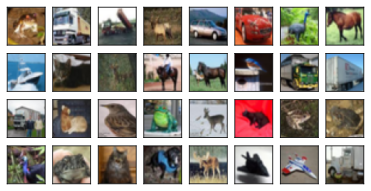

In [26]:
all_images = torchvision.datasets.CIFAR10(train=True, root="../data", download=True)
tl.show_images([all_images[i][0] for i in range(32)], 4, 8, scale=0.8)
tl.plt.show()

In [27]:
train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor()])

test_augs = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()])

In [28]:
def load_cifar10(is_train, augs, batch_size):
    dataset = torchvision.datasets.CIFAR10(root="../data", train=is_train, transform=augs, download=True)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=is_train, num_workers=tl.get_dataloader_workers())
    return dataloader

In [ ]:
batch_size, devices, net = 256, tl.try_all_gpus(), tl.resnet18(10, 3)

def init_weights(m):
    if type(m) in [nn.Linear, nn.Conv2d]:
        nn.init.xavier_uniform_(m.weight)
        
net.apply(init_weights)

def train_with_data_aug(train_augs, test_augs, net, lr=0.001):
    train_iter = load_cifar10(True, train_augs, batch_size)
    test_iter = load_cifar10(False, test_augs, batch_size)
    loss = nn.CrossEntropyLoss(reduction="none")
    trainer = torch.optim.SGD(net.parameters(), lr=lr)
    tl.train_ch13(net, train_iter, test_iter, loss, trainer, 10, devices)

In [ ]:
train_with_data_aug(train_augs, test_augs, net)